In [ ]:
## Notebook env: mirtud_env (R kernel)
## evaluating proliferation effects of selected TuDs

In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Analysis

In [2]:
## load in data
selected_TuDs_tRFs_proliferation_assay = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/041024_tRF_proliferation_assay_selected_hits_from_original_single_cell_screen_raw_data.txt', sep='\t', header=T)
tRF_names = c('untransduced', 'NC1', 'NC2', 'tRNA-Gly-CCC', 'tRNA-Met-CAT', 'tRNA-Asp-GTC', 'tRNA-Arg-CCT', 'tRNA-Arg-ACG', 'tRNA-Ala-TGC', 'tRNA-Gln-TTG', 'tRNA-Gly-TCC', 'tRNA-Cys-GCA')
colnames(selected_TuDs_tRFs_proliferation_assay) = c('Time Stamp', 'Elapsed hours', unlist(lapply(tRF_names, function(x) paste(x, 1:8, sep = '_'))))
selected_TuDs_tRFs_proliferation_assay = selected_TuDs_tRFs_proliferation_assay[colnames(selected_TuDs_tRFs_proliferation_assay) != 'Time Stamp']
head(selected_TuDs_tRFs_proliferation_assay)

,Elapsed hours,untransduced_1,untransduced_2,untransduced_3,untransduced_4,untransduced_5,untransduced_6,untransduced_7,untransduced_8,NC1_1,⋯,tRNA-Gly-TCC_7,tRNA-Gly-TCC_8,tRNA-Cys-GCA_1,tRNA-Cys-GCA_2,tRNA-Cys-GCA_3,tRNA-Cys-GCA_4,tRNA-Cys-GCA_5,tRNA-Cys-GCA_6,tRNA-Cys-GCA_7,tRNA-Cys-GCA_8
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,2.852621,3.219548,3.458021,2.957243,2.980120,3.260557,3.099869,2.802427,2.124501,⋯,2.621285,1.987851,2.161277,2.338116,2.385783,2.459571,2.570101,2.474664,2.184905,1.952340
2,6,3.648485,3.905192,4.318420,4.253271,3.863465,4.215575,3.907377,3.614408,2.790169,⋯,3.739245,2.766472,3.172906,3.673274,3.819657,3.613794,4.032553,3.851138,3.060636,2.714570
3,12,4.328664,4.773204,5.074881,4.909139,4.684359,4.737797,4.578337,4.371175,3.478543,⋯,4.909651,3.761132,4.233705,4.671964,4.404399,4.325558,5.013624,4.803389,3.932611,3.573877
4,18,4.894866,5.412273,6.123286,5.802351,5.548718,5.537279,5.411009,4.821555,3.776770,⋯,5.749767,4.838253,4.806121,5.381166,5.519968,4.978317,5.983598,5.336198,5.002903,4.539343
5,24,5.387279,5.987659,6.602313,6.370807,6.337786,6.289710,6.251879,5.412615,4.643724,⋯,6.654147,5.260873,5.353405,6.091156,6.260824,5.932616,7.030839,6.123013,5.379870,4.977736
6,30,5.679428,6.703554,7.769373,7.522127,6.780655,7.246093,7.246709,5.916671,5.205078,⋯,7.325039,5.339476,6.140735,7.054743,7.106029,6.943291,7.493717,6.979930,6.490487,5.328411


In [3]:
## mean by replicate
selected_TuDs_tRFs_proliferation_assay_mean = selected_TuDs_tRFs_proliferation_assay %>% pivot_longer(cols = -c('Elapsed hours'), names_to = c('tRF', 'replicate'), names_sep = '_') %>% group_by(`Elapsed hours`, tRF) %>% summarise(mean = mean(value), sd = sd(value))
head(selected_TuDs_tRFs_proliferation_assay_mean)

`summarise()` has grouped output by 'Elapsed hours'. You can override using the
`.groups` argument.


Elapsed hours,tRF,mean,sd
<int>,<chr>,<dbl>,<dbl>
0,NC1,2.532976,0.4129829
0,NC2,2.301017,0.3819533
0,tRNA-Ala-TGC,3.268702,0.4509800
0,tRNA-Arg-ACG,2.319216,0.2708201
0,tRNA-Arg-CCT,3.100219,0.7654729
0,tRNA-Asp-GTC,2.790916,0.2978600


In [4]:
wider_selected_TuDs_tRFs_proliferation_assay_mean = selected_TuDs_tRFs_proliferation_assay_mean %>% select(-sd) %>% pivot_wider(names_from = 'tRF', values_from = 'mean')
wider_selected_TuDs_tRFs_proliferation_assay_mean = as.data.frame(wider_selected_TuDs_tRFs_proliferation_assay_mean)
head(wider_selected_TuDs_tRFs_proliferation_assay_mean)

,Elapsed hours,NC1,NC2,tRNA-Ala-TGC,tRNA-Arg-ACG,tRNA-Arg-CCT,tRNA-Asp-GTC,tRNA-Cys-GCA,tRNA-Gln-TTG,tRNA-Gly-CCC,tRNA-Gly-TCC,tRNA-Met-CAT,untransduced
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,2.532976,2.301017,3.268702,2.319216,3.100219,2.790916,2.315845,2.792738,0.01424296,2.318273,2.696559,3.078801
2,6,3.390409,3.117966,4.927765,3.390678,4.744505,3.830545,3.492316,3.996565,0.02101658,3.516069,3.671171,3.965774
3,12,4.121968,3.698265,6.115180,4.152546,5.932027,4.678114,4.369891,5.113491,0.02341957,4.497454,4.585272,4.682194
4,18,4.762756,4.402103,7.374570,4.992296,6.921443,5.505985,5.193452,6.241963,0.02120438,5.379937,5.269763,5.443917
5,24,5.467401,4.920927,8.335272,5.731667,7.975557,6.457523,5.893682,7.139039,0.02530612,6.191606,5.976733,6.080006
6,30,6.266573,5.724500,9.423423,6.424944,8.976982,7.281370,6.692168,7.980654,0.02266410,6.824665,6.862745,6.858076


### Results

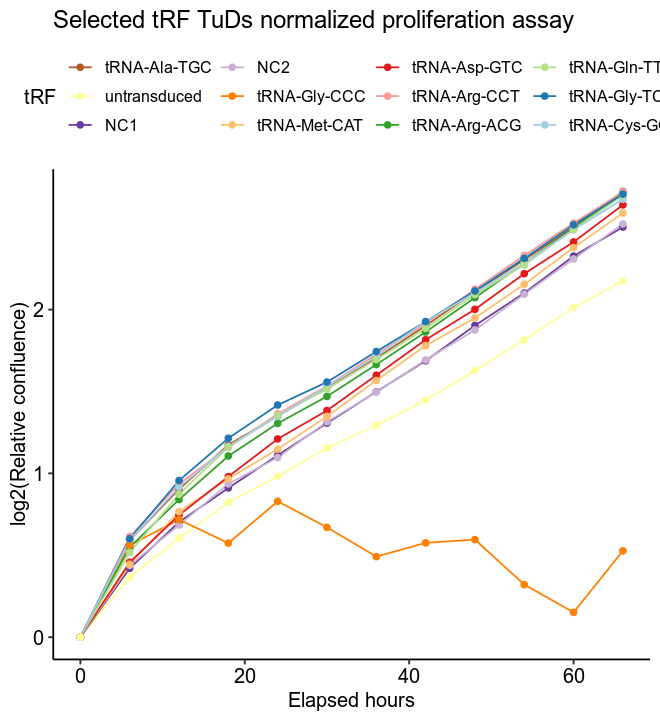

In [6]:
options(repr.plot.width=5.5, repr.plot.height=6)
## normalized starting point proliferation assay plot
## get log2 version of data
log2_wider_selected_TuDs_tRFs_proliferation_assay_mean = cbind('Elapsed hours' = wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`, wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-`Elapsed hours`) %>% log2())
minimum = log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% filter(`Elapsed hours` == 0) %>% select(-`Elapsed hours`) %>% min()
diff_from_minimum =  log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% filter(`Elapsed hours` == 0) %>% select(-`Elapsed hours`) - minimum
diff_from_minimum = as.numeric(diff_from_minimum)
## first subract min from all points
zeroed_data = log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-`Elapsed hours`) - minimum

## then subtract difference between min and first points from all points
normalized_log2_data = zeroed_data
for (i in 1:ncol(zeroed_data)){
    normalized_log2_data[,i] = zeroed_data[,i] - diff_from_minimum[i]
}
normalized_log2_data = cbind('Elapsed hours' = wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`, normalized_log2_data)

## plot
normalized_longer_log2_data = normalized_log2_data %>% pivot_longer(cols = -c('Elapsed hours'), names_to = c('tRF'), values_to = 'mean') %>% as.data.frame()
normalized_longer_log2_data$tRF = factor(normalized_longer_log2_data$tRF, levels = c('tRNA-Ala-TGC', 'untransduced', 'NC1', 'NC2', 'tRNA-Gly-CCC', 'tRNA-Met-CAT', 'tRNA-Asp-GTC', 'tRNA-Arg-CCT', 'tRNA-Arg-ACG', 'tRNA-Gln-TTG', 'tRNA-Gly-TCC', 'tRNA-Cys-GCA'))
ggplot(normalized_longer_log2_data, aes(x = `Elapsed hours`, y = mean, color = tRF)) +
geom_line() +
geom_point() +
theme_pubr() + scale_color_brewer(palette = "Paired", direction = -1) + 
labs(title = "Selected tRF TuDs normalized proliferation assay",
      x = "Elapsed hours",
      y = "log2(Relative confluence)")

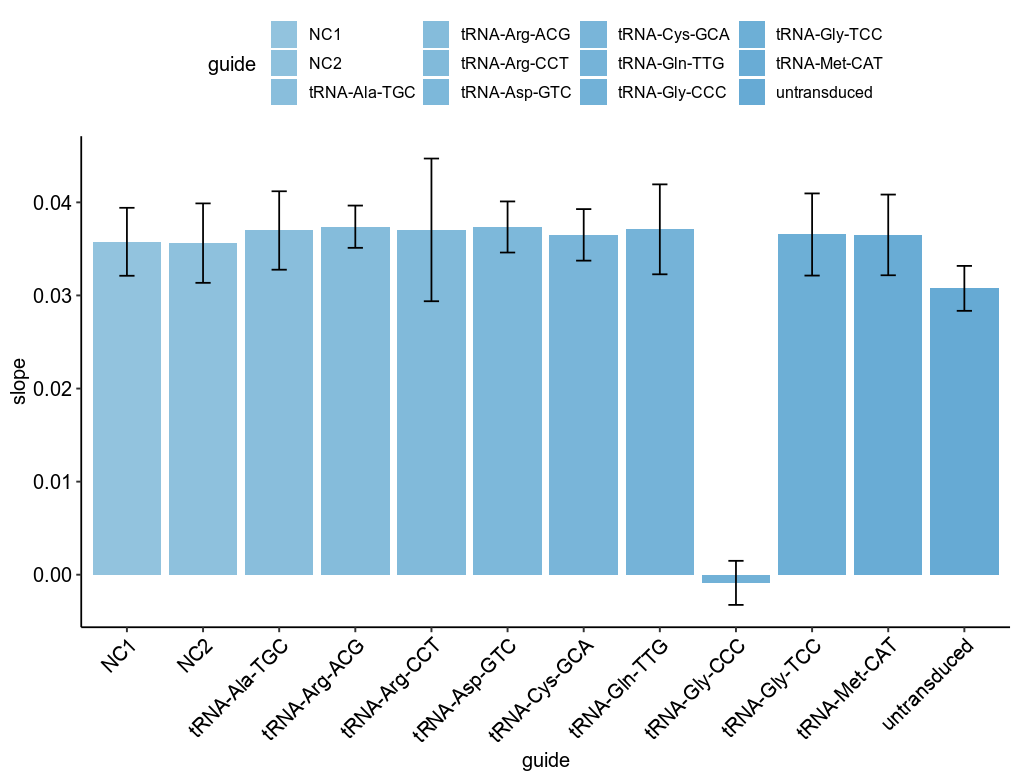

In [7]:
options(repr.plot.width=8.5, repr.plot.height=6.5)
## fitted line slopes logged
slopes = list()
upper_error = list()
lower_error = list()
n = 1
for (i in 1:length(colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean))){
    if (i > 1){
        slopes[[n]] = as.numeric(coef(lm(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean[,i] ~ log2_wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`))[2])
        limits = abs(slopes[[n]] - as.numeric(confint(lm(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean[,i] ~ log2_wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`))[2,]))
        upper_error[[i]] = limits[2]
        lower_error[[i]] = limits[1]
        n = n + 1
    }
}

names(slopes) = colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean)[!colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean) %in% 'Elapsed hours']
slopes = unlist(slopes)
slopes_df = data.frame(guide = names(slopes[order(slopes)]), slope = slopes[order(slopes)], upper_error = unlist(upper_error), lower_error = unlist(lower_error))
ggplot(data = slopes_df, aes(x = guide, y = slope, fill = guide)) +
  geom_bar(stat = "identity") + scale_fill_manual(values = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(100)[41:(40 + nrow(slopes_df))]) + geom_errorbar(aes(ymin = slope - lower_error, ymax = slope + upper_error), width=.2) + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

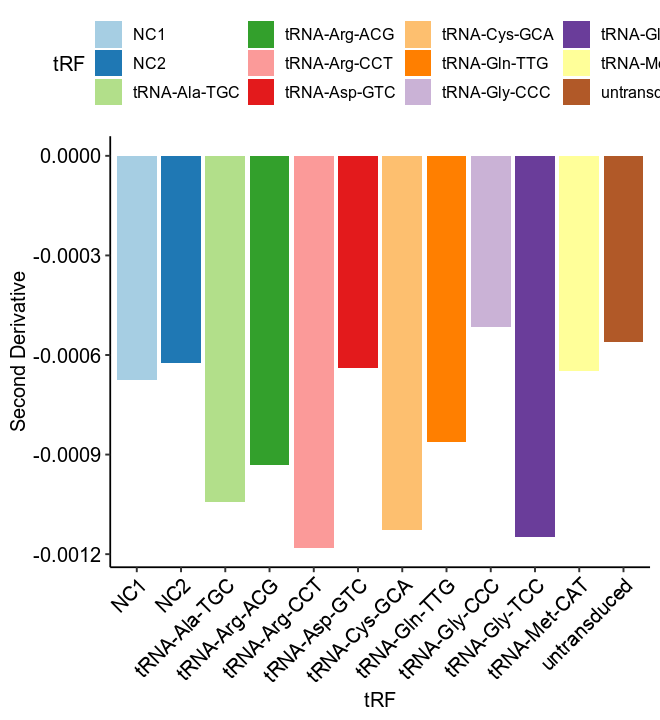

In [7]:
## look at second derivative of the data
second_derivatives = data.frame(apply(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-"Elapsed hours"), 2, function(x) mean(diff(diff(x)/6)/6)))
colnames(second_derivatives) = 'Second Derivative'
second_derivatives$tRF = rownames(second_derivatives)
ggplot(data = second_derivatives, aes(x = tRF, y = `Second Derivative`, fill = tRF)) +
  geom_bar(stat = "identity") + scale_fill_brewer(palette = "Paired") + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1))